## Importing necessary libraries

In [1]:
import numpy as np
import os
import pandas as pd
from skimage.transform import resize
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Annotating the dataset

In [2]:
import os
import pandas as pd
import random
from datetime import datetime, timedelta

# Define the directory of the dataset
dataset_dir = r'C:\Users\meghn\Downloads\Weather classification by multimodal\_1-002\_1'

# Define the classifications
classifications = ['Tropical Cyclone', 'Extratropical Cyclone', 'Frontal Surface', 'Westerly Jet', 'Snow']

# Initialize a list to store annotations
annotations3 = []

# Iterate over images in the dataset directory
for filename in os.listdir(dataset_dir):
    if filename.endswith('.jpg'):
        # Randomly select a classification
        class_label = random.choice(classifications)
        
        # Extract image name
        image_name = filename
        
        # Generate timestamp (2019 Jan 1 to March 30)
        start_date = datetime(2019, 1, 1)
        end_date = datetime(2019, 3, 30)
        timestamp = start_date + timedelta(days=random.randint(0, (end_date - start_date).days))
        
        # Assign season based on classification
        if class_label == 'Tropical Cyclone':
            season = 'Summer'
        elif class_label == 'Extratropical Cyclone' or class_label == 'Frontal Surface':
            season = 'Autumn'
        else:
            season = 'Winter'
        
        # Fill latitude and longitude based on classification
        if class_label == 'Tropical Cyclone':
            latitude = round(random.uniform(0, 30), 6)  # 0° to 30°
            longitude = round(random.uniform(60, 180), 6)  # 60° to 180°
        elif class_label == 'Extratropical Cyclone' or class_label == 'Frontal Surface':
            latitude = round(random.uniform(30, 60), 6)  # 30° to 60°
            longitude = round(random.uniform(30, 150), 6)  # 30° to 150°
        elif class_label == 'Westerly Jet':
            latitude = round(random.uniform(8, 11), 6)  # 8° to 11°
            longitude = round(random.uniform(10, 20), 6)  # 10° to 20°
        else:  # Snow
            latitude = 35  # 35°
            longitude = round(random.uniform(70, 80), 6)  # 70° to 80°
        
        # Append annotation
        annotations3.append({
            'Image Name': image_name,
            'Classification': class_label,
            'Season': season,
            'Timestamp': timestamp,
            'Latitude': latitude,
            'Longitude': longitude
        })

annotations3_df = pd.DataFrame(annotations3)


annotations3_df.to_csv(os.path.join(dataset_dir, 'annotations.csv'), index=False)
print("Annotations saved to annotations.csv.")


Annotations saved to annotations.csv.


In [3]:
annotations3_df.head(10)

Image Name         Classification  Season  Timestamp   Latitude  \
0   20190101_10_1.jpg       Tropical Cyclone  Summer 2019-02-24   4.057803   
1  20190101_10_10.jpg           Westerly Jet  Winter 2019-01-02   9.751714   
2  20190101_10_11.jpg        Frontal Surface  Autumn 2019-03-13  51.074351   
3  20190101_10_12.jpg                   Snow  Winter 2019-01-24  35.000000   
4  20190101_10_13.jpg  Extratropical Cyclone  Autumn 2019-03-07  49.049411   
5  20190101_10_14.jpg           Westerly Jet  Winter 2019-02-24   9.216054   
6  20190101_10_15.jpg  Extratropical Cyclone  Autumn 2019-03-05  41.033841   
7  20190101_10_16.jpg       Tropical Cyclone  Summer 2019-01-14  26.811236   
8  20190101_10_17.jpg       Tropical Cyclone  Summer 2019-01-14   9.631944   
9  20190101_10_18.jpg       Tropical Cyclone  Summer 2019-02-11  28.491510   

    Longitude  
0  127.325415  
1   17.538764  
2   97.240684  
3   71.378737  
4   36.819331  
5   10.973459  
6  120.045961  
7   67.953059  
8  116.919014  
9  140.184069

In [4]:
annotations3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Image Name      10000 non-null  object        
 1   Classification  10000 non-null  object        
 2   Season          10000 non-null  object        
 3   Timestamp       10000 non-null  datetime64[ns]
 4   Latitude        10000 non-null  float64       
 5   Longitude       10000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 468.9+ KB


In [5]:
annotations3_df.shape

(10000, 6)

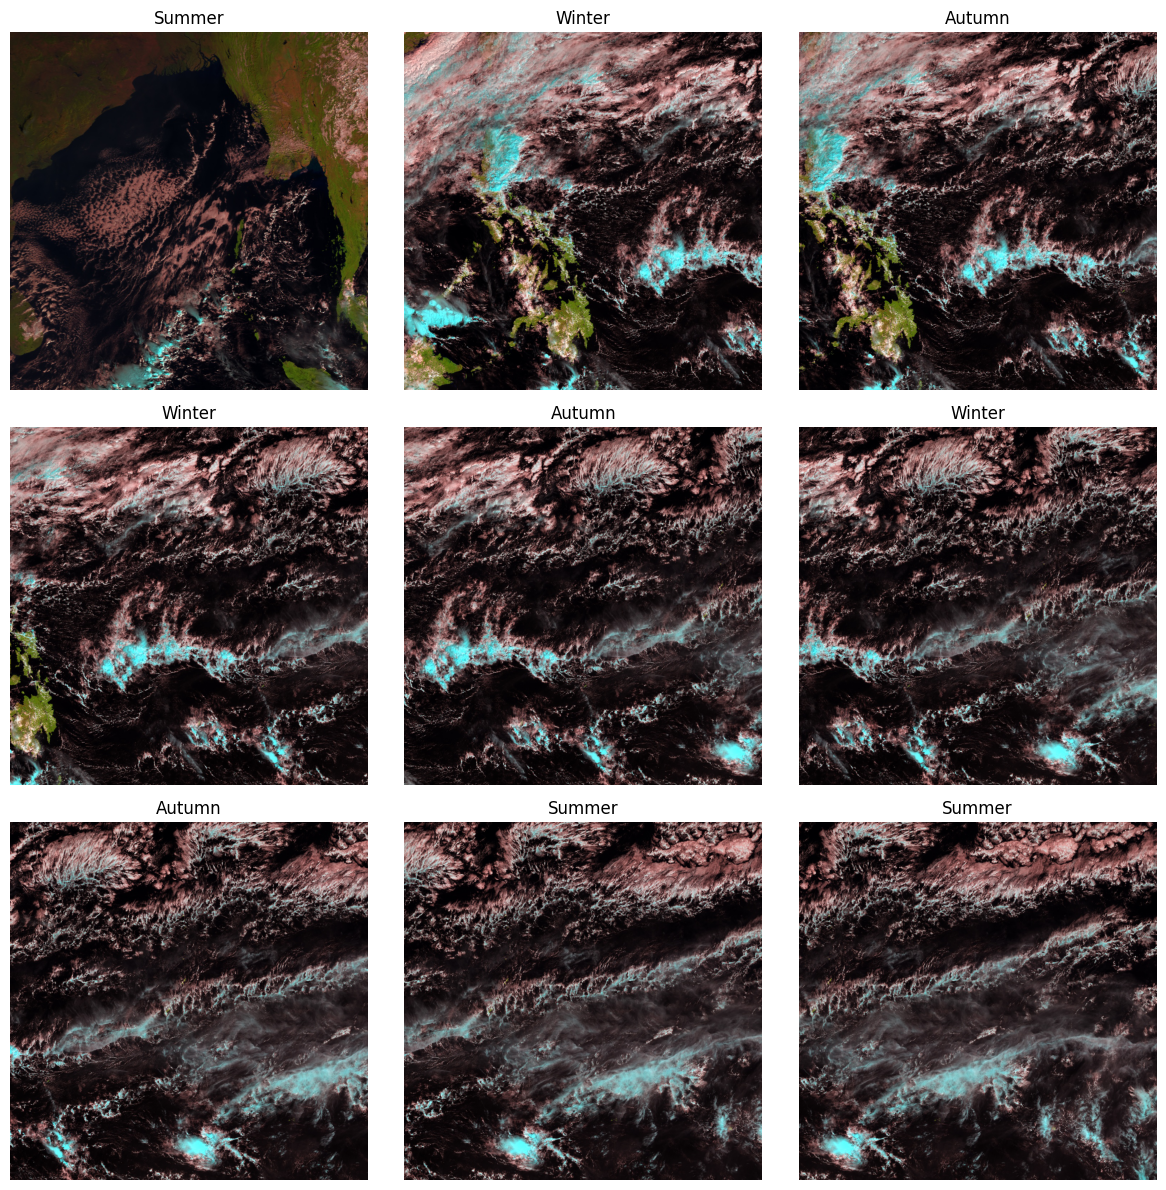

In [6]:

# Define the directory containing the images
image_dir = r"C:\Users\meghn\Downloads\Weather classification by multimodal\_1-002\_1"


fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, (index, row) in enumerate(annotations3_df.iterrows()):
    if i >= 9:
        break
    
   
    image_path = os.path.join(image_dir, row['Image Name'])
    image = plt.imread(image_path)
    axes[i // 3, i % 3].imshow(image)
    axes[i // 3, i % 3].set_title(row['Season'])  
    axes[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.show()

## Importing the image dataset

In [7]:
import glob
images1=glob.glob(r"C:\Users\meghn\Downloads\Weather classification by multimodal\_1-002\_1\*jpg")

In [8]:
len(images1)

10000

In [9]:
type(images1)

list

## Preprocessing the annotated dataset

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in annotations3_df[['Season', 'Classification']]:
    label_encoders[column] = LabelEncoder()
    annotations3_df[column] = label_encoders[column].fit_transform(annotations3_df[column])

In [11]:
season_mapping = dict(zip(label_encoders['Season'].classes_, label_encoders['Season'].transform(label_encoders['Season'].classes_)))
classification_mapping = dict(zip(label_encoders['Classification'].classes_, label_encoders['Classification'].transform(label_encoders['Classification'].classes_)))

print("Season Mapping:")
print(season_mapping)

print("\nClassification Mapping:")
print(classification_mapping)


Season Mapping:
{'Autumn': 0, 'Summer': 1, 'Winter': 2}

Classification Mapping:
{'Extratropical Cyclone': 0, 'Frontal Surface': 1, 'Snow': 2, 'Tropical Cyclone': 3, 'Westerly Jet': 4}


In [12]:
annotations3_df

Image Name  Classification  Season  Timestamp   Latitude  \
0      20190101_10_1.jpg               3       1 2019-02-24   4.057803   
1     20190101_10_10.jpg               4       2 2019-01-02   9.751714   
2     20190101_10_11.jpg               1       0 2019-03-13  51.074351   
3     20190101_10_12.jpg               2       2 2019-01-24  35.000000   
4     20190101_10_13.jpg               0       0 2019-03-07  49.049411   
...                  ...             ...     ...        ...        ...   
9995    20190204_9_2.jpg               1       0 2019-03-13  40.512151   
9996   20190204_9_20.jpg               3       1 2019-03-28   9.045156   
9997   20190204_9_21.jpg               0       0 2019-01-16  47.410036   
9998   20190204_9_22.jpg               2       2 2019-02-27  35.000000   
9999   20190204_9_23.jpg               1       0 2019-03-01  37.974077   

       Longitude  
0     127.325415  
1      17.538764  
2      97.240684  
3      71.378737  
4      36.819331  
...          ...  
9995  145.150303  
9996   74.323961  
9997  119.496270  
9998   71.326305  
9999   69.326085  

[10000 rows x 6 columns]

## One hot encoding the season column

In [13]:
season_onehot = pd.get_dummies(annotations3_df['Season'], prefix='Season',dtype='int')
df = pd.concat([annotations3_df, season_onehot], axis=1)
df.drop('Season', axis=1, inplace=True)

In [14]:
df

Image Name  Classification  Timestamp   Latitude   Longitude  \
0      20190101_10_1.jpg               3 2019-02-24   4.057803  127.325415   
1     20190101_10_10.jpg               4 2019-01-02   9.751714   17.538764   
2     20190101_10_11.jpg               1 2019-03-13  51.074351   97.240684   
3     20190101_10_12.jpg               2 2019-01-24  35.000000   71.378737   
4     20190101_10_13.jpg               0 2019-03-07  49.049411   36.819331   
...                  ...             ...        ...        ...         ...   
9995    20190204_9_2.jpg               1 2019-03-13  40.512151  145.150303   
9996   20190204_9_20.jpg               3 2019-03-28   9.045156   74.323961   
9997   20190204_9_21.jpg               0 2019-01-16  47.410036  119.496270   
9998   20190204_9_22.jpg               2 2019-02-27  35.000000   71.326305   
9999   20190204_9_23.jpg               1 2019-03-01  37.974077   69.326085   

      Season_0  Season_1  Season_2  
0            0         1         0  
1            0         0         1  
2            1         0         0  
3            0         0         1  
4            1         0         0  
...        ...       ...       ...  
9995         1         0         0  
9996         0         1         0  
9997         1         0         0  
9998         0         0         1  
9999         1         0         0  

[10000 rows x 8 columns]

## Splitting into X and Y variables

In [15]:
X = df.drop(['Image Name', 'Classification', 'Timestamp'], axis=1)  # Features
y = df['Classification']  # Labels

In [16]:
X.head()

Latitude   Longitude  Season_0  Season_1  Season_2
0   4.057803  127.325415         0         1         0
1   9.751714   17.538764         0         0         1
2  51.074351   97.240684         1         0         0
3  35.000000   71.378737         0         0         1
4  49.049411   36.819331         1         0         0

In [17]:
y.unique()

array([3, 4, 1, 2, 0])

## Feature scaling


In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [19]:
df_scaled=scaler.fit_transform(X)

C:\Users\meghn\Desktop\anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\meghn\Desktop\anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [20]:
df_scaled

array([[-1.57554512,  1.1087366 , -0.81411721,  1.97048535, -0.81072526],
       [-1.22771593, -1.38868557, -0.81411721, -0.50748918,  1.23346349],
       [ 1.29659808,  0.42437039,  1.22832436, -0.50748918, -0.81072526],
       ...,
       [ 1.07275269,  0.93063953,  1.22832436, -0.50748918, -0.81072526],
       [ 0.31464939, -0.16512883, -0.81411721, -0.50748918,  1.23346349],
       [ 0.49632957, -0.21062975,  1.22832436, -0.50748918, -0.81072526]])

In [21]:
df_scaled[0]

array([-1.57554512,  1.1087366 , -0.81411721,  1.97048535, -0.81072526])

In [22]:
xcolumns = X.columns

In [23]:
X = pd.DataFrame(df_scaled, columns = xcolumns)

In [24]:
X

Latitude  Longitude  Season_0  Season_1  Season_2
0    -1.575545   1.108737 -0.814117  1.970485 -0.810725
1    -1.227716  -1.388686 -0.814117 -0.507489  1.233463
2     1.296598   0.424370  1.228324 -0.507489 -0.810725
3     0.314649  -0.163936 -0.814117 -0.507489  1.233463
4     1.172899  -0.950092  1.228324 -0.507489 -0.810725
...        ...        ...       ...       ...       ...
9995  0.651375   1.514216  1.228324 -0.507489 -0.810725
9996 -1.270878  -0.096938 -0.814117  1.970485 -0.810725
9997  1.072753   0.930640  1.228324 -0.507489 -0.810725
9998  0.314649  -0.165129 -0.814117 -0.507489  1.233463
9999  0.496330  -0.210630  1.228324 -0.507489 -0.810725

[10000 rows x 5 columns]

In [25]:
type(images1)

list

In [26]:
# Assuming images1 is a list of image filenames
for i in range(5):
    image_path = images1[i]  # Get the filename of the image
    image = plt.imread(image_path)  # Load the image
    image_shape = image.shape  # Get the shape of the image
    print(f"Shape of Image {i+1}: {image_shape}")


Shape of Image 1: (1000, 1000, 3)
Shape of Image 2: (1000, 1000, 3)
Shape of Image 3: (1000, 1000, 3)
Shape of Image 4: (1000, 1000, 3)
Shape of Image 5: (1000, 1000, 3)


In [27]:
c=plt.imread(images1[0])
c.shape

(1000, 1000, 3)

In [28]:
resized_images = []
for image_path in images1:
    # Load the image
    image = cv2.imread(image_path)
    # Resize the image
    resized_image = cv2.resize(image, (224, 224))
    # Append the resized image to the list
    resized_images.append(resized_image)

# Convert the list of resized images to a NumPy array
resized_images = np.array(resized_images)

## Train test split

In [29]:
from sklearn.model_selection import train_test_split
#train test splitting for csv data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train test splitting for image data
X_image_train, X_image_test = train_test_split(resized_images, test_size=0.2, random_state=42)


In [30]:
X_train.shape

(8000, 5)

In [31]:
X_image_train.shape

(8000, 224, 224, 3)

## Model Building

In [32]:
import numpy as np

X_train_metadata_reshaped = np.expand_dims(X_train, axis=1)

In [33]:
y_train

9254    0
1561    0
1670    3
6087    1
6669    4
       ..
5734    4
5191    4
5390    1
860     3
7270    2
Name: Classification, Length: 8000, dtype: int32

In [ ]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Concatenate
from keras.applications import InceptionV3
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Define input shapes for image and metadata
image_input_shape = (224, 224, 3)  
metadata_input_shape = (5,)  # Updated shape for metadata input

# Define input layers for image and metadata
image_input = Input(shape=image_input_shape, name='image_input')
metadata_input = Input(shape=metadata_input_shape, name='metadata_input')

# InceptionV3 branch for image processing
inception_model = InceptionV3(weights='imagenet', include_top=False)
for layer in inception_model.layers:
    layer.trainable = False

image_features = inception_model(image_input)
image_features_flatten = Flatten()(image_features)

# CNN branch for image processing
cnn_features = Conv2D(filters=64, kernel_size=3, activation='relu')(image_input)
cnn_features = MaxPooling2D(pool_size=(2, 2))(cnn_features)
cnn_features = Flatten()(cnn_features)

# LSTM branch for metadata processing
from keras.layers import Reshape

# Reshape metadata input for LSTM
metadata_input_reshaped = Reshape((1, 5))(metadata_input)

# LSTM branch for metadata processing
metadata_lstm = LSTM(units=128)(metadata_input_reshaped)

# Concatenate features from all branches
concatenated_features = Concatenate()([image_features_flatten, cnn_features, metadata_lstm])

# Fully connected layers for classification
fc_layer = Dense(256, activation='relu')(concatenated_features)
output_layer = Dense(5, activation='softmax')(fc_layer)  # num_classes: number of output classes

# Define the model
model = Model(inputs=[image_input, metadata_input], outputs=output_layer)

# Compile the model
optimizer = Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print model summary
model.summary()


In [53]:
from keras.utils import to_categorical

# Convert target labels to one-hot encoding
y_train_one_hot = to_categorical(y_train)


In [72]:
# Convert target labels to one-hot encoding
y_test_one_hot = to_categorical(y_test)

In [55]:
y_train_one_hot

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [73]:
y_test_one_hot

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [59]:
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

## Training the model

In [60]:
from keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model with early stopping
fit_model = model.fit([X_image_train, X_train], y_train_one_hot, epochs=5, 
                    validation_split=0.2, callbacks=[early_stopping])


Epoch 1/5
200/200 [==============================] - 6282s 31s/step - loss: 40.5651 - accuracy: 0.2581 - val_loss: 28.8337 - val_accuracy: 0.2694
Epoch 2/5
200/200 [==============================] - 6285s 31s/step - loss: 8.1341 - accuracy: 0.6198 - val_loss: 17.8477 - val_accuracy: 0.3281
Epoch 3/5
200/200 [==============================] - 6917s 35s/step - loss: 2.8975 - accuracy: 0.7900 - val_loss: 22.8453 - val_accuracy: 0.3350
Epoch 4/5
200/200 [==============================] - 7437s 37s/step - loss: 2.4606 - accuracy: 0.8297 - val_loss: 19.4641 - val_accuracy: 0.3519
Epoch 5/5
200/200 [==============================] - 6793s 34s/step - loss: 1.9037 - accuracy: 0.8569 - val_loss: 18.3733 - val_accuracy: 0.3787


## Saving model 

In [61]:
# Save the entire model to a HDF5 file
model.save("my_model.h5")


## Prediction

In [65]:
predictions = model.predict([X_image_test, X_test])

63/63 [==============================] - 408s 6s/step


In [66]:
predictions

array([[3.9661658e-26, 2.3890961e-02, 7.7982175e-01, 3.1145483e-21,
        1.9628727e-01],
       [3.8207001e-30, 7.2082781e-07, 9.9983466e-01, 7.4327428e-10,
        1.6460071e-04],
       [0.0000000e+00, 1.2895700e-11, 2.7314071e-17, 5.8263616e-10,
        1.0000000e+00],
       ...,
       [5.3046092e-22, 6.9046595e-11, 3.9396860e-02, 1.4382358e-04,
        9.6045929e-01],
       [0.0000000e+00, 1.6488519e-06, 9.9999833e-01, 0.0000000e+00,
        4.0896009e-19],
       [2.2847341e-23, 6.7295724e-14, 1.3335175e-16, 9.9994838e-01,
        5.1591171e-05]], dtype=float32)

In [67]:
predicted_labels = np.argmax(predictions, axis=1)

In [70]:
predicted_labels

array([2, 2, 4, ..., 4, 2, 3], dtype=int64)

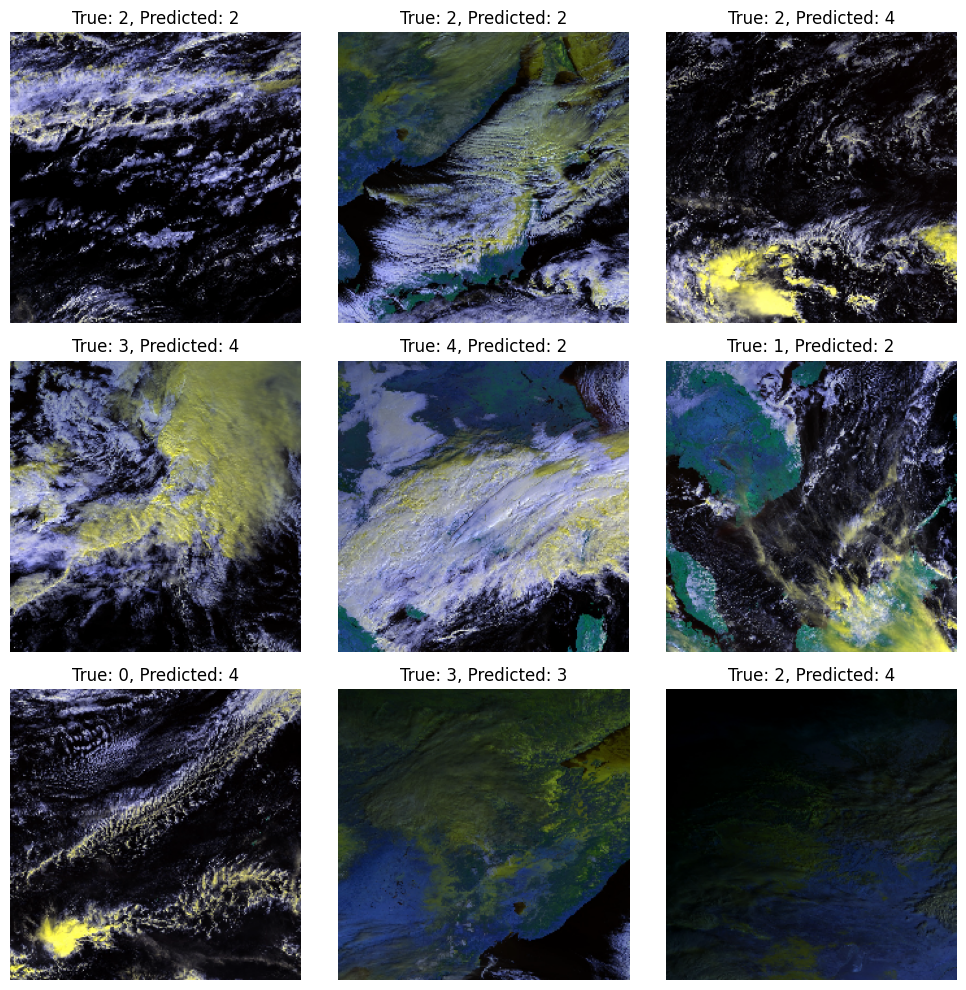

In [104]:
def plot_images(images, labels, predicted_labels, nrows=3, ncols=3):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])  # Plot the image
        ax.set_axis_off()  # Turn off axis
        ax.set_title(f"True: {labels[i]}, Predicted: {predicted_labels[i]}")  # Set title with true and predicted labels
    plt.tight_layout()  # Adjust layout
    plt.show()
# Convert pandas Series objects to numpy arrays
y_test_np = y_test.to_numpy()
# Plot a sample of images with their true and predicted labels
plot_images(X_image_test[:9], y_test_np[:9], predicted_labels[:9])  # Change the indices as needed

## Evaluation of the model

In [74]:
evaluation=model.evaluate([X_image_test, X_test], y_test_one_hot)

63/63 [==============================] - 385s 6s/step - loss: 18.9884 - accuracy: 0.3285


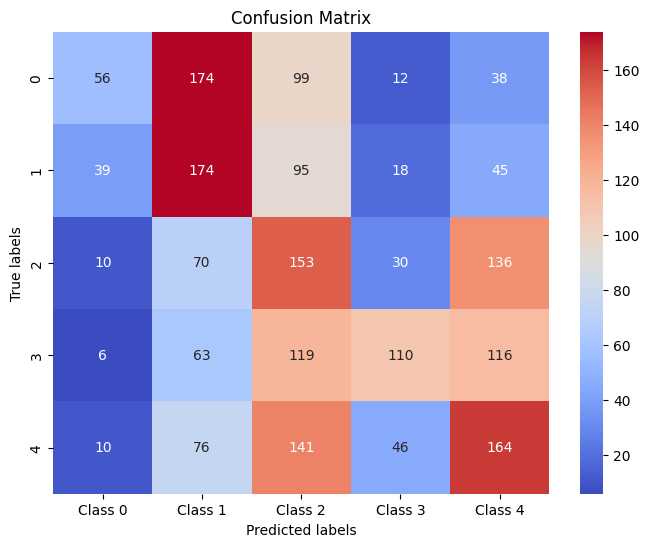

In [92]:
from sklearn.metrics import confusion_matrix, classification_report
# Plot the confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Classification report

In [78]:
# Generate a classification report
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']
print(classification_report(y_test, predicted_labels, target_names=class_names))

              precision    recall  f1-score   support

     Class 0       0.46      0.15      0.22       379
     Class 1       0.31      0.47      0.38       371
     Class 2       0.25      0.38      0.30       399
     Class 3       0.51      0.27      0.35       414
     Class 4       0.33      0.38      0.35       437

    accuracy                           0.33      2000
   macro avg       0.37      0.33      0.32      2000
weighted avg       0.37      0.33      0.32      2000



## Predicting by giving image path and textdata information

In [120]:
# Assuming 'image_path' is the path to the image file, 'model' is your trained model,
# and 'scaled_metadata' is the array of scaled metadata values

# Load and preprocess the image
image = cv2.imread(r"C:\Users\meghn\Downloads\Weather classification by multimodal\_1-002\_1\20190204_9_19.jpg")
image = cv2.resize(image, (224, 224))  # Resize to match the input size of InceptionV3
image = image / 255.0  # Normalize the pixel values
image_input = np.expand_dims(image, axis=0)  # Add batch dimension

# Extract metadata for the given image (assuming the filename is 'image1.jpg')
metadata_input = np.array([-0.15837153, -0.004452, -0.81581634, 2.02022296, -0.8226342]).reshape(1, -1)  

# Make predictions
predictions = model.predict([image_input, metadata_input])  # Pass both image and metadata inputs

# Convert predicted probabilities to class labels
predicted_class = np.argmax(predictions[0])  # Assuming only one image is predicted
print(f'The given image belongs to classification {predicted_class}')

1/1 [==============================] - 1s 983ms/step
The given image belongs to classification 3


## Reloading the model for later use

In [88]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('my_model.h5')